# Confidence intervals

## Outline

- Introduction
- Determining the confidence interval with z-score vs t-score
- Wrap up


## Introduction 

In Confidence Intervals part 1 we discussed the definition of the confidence interval. As we mentioned, we can use a normal distribution or a t-distribution in order to determine our confidence interval.

We would choose the type of confidence interval function based on the sample size. In the case where the sample size is small (< 30), we would use a t-distribution (t-score). If the sample size is large, (>=30) we would use a normal distribution (z-score).


## Confidence interval using the z-score vs t-score

Z-score ($Z_{\alpha/2}$) is used for a normal distribution, and t-score ($t_{\alpha/2,df}$) is used for a t-distribution. 

You should use **z-score** if you know the population variance $\sigma^2$. If not, you use the **t-score**. 

**Since the population variance $\sigma^2$ is almost never known, you almost always use t-score to calculate the confidence interval.** After all, the purpose of using the confidence interval is to mitigate the issue of difference between the Population vs. Samples when estimating population parameters ($\sigma^2$) from samples. If you know the population parameters, you probably don't need the confidence interval in the first place.

The **Python** "`stats`" package has a library for the t distribution. 

The "`t`" library functions are similar to the "`norm`" library, except that **degrees of freedom** must be specified. Remember, degrees of freedom (df) in these cases is $n - 1$. Thus 21 observations would yield $df = 20$

### Let's set up the environment for an example

In [41]:
# import the stats functions from scipy and import numpy
import scipy.stats as stats
import numpy as np
# We will be using Seaborn to graph our distributions
import seaborn as sns
#set style for seaborn
sns.set_style('whitegrid')
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# include an example using the Z-score (where we know the population)
# Read into the data called `bodytemp`
import pandas as pd
body = pd.read_csv('data/bodytemp.csv')

In [42]:
# let's take a look at the data
body.head()


,temp,sex,bpm
0,96.3,0,70
1,96.7,0,71
2,96.9,0,74
3,97.0,0,80
4,97.1,0,73


In [43]:
# extract only the female population heartrate data
female_hr = body[body.sex == 1]['bpm']
female_hr

65     69
66     62
67     75
68     66
69     68
       ..
125    68
126    77
127    79
128    78
129    77
Name: bpm, Length: 65, dtype: int64

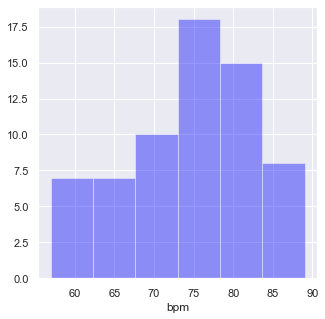

In [44]:
# Now plot the data using Seaborn displot
sns.distplot(female_hr,color='blue', kde=False)

In [45]:
# 65 female samples in our data set
n = len(female_hr)
x_bar = female_hr.mean()
std_dev = female_hr.std()
print('mean:', x_bar, 'stdev:', std_dev)

mean: 74.15384615384616 stdev: 8.105227420526925


### Calculating the confidence interval using the Z-score (normal distribution)

In [46]:
# Calculating CI using the .interval function
print('Calculation with .interval():',  # 'loc' is the mean of the distribution, 'scale' is the sd
           stats.norm.interval(alpha = .05, loc = x_bar, scale= std_dev/ np.sqrt(n)))

Calculation with .interval(): (74.0908051655888, 74.21688714210352)


### Calculating the confidence interval using the t-score (t-distribution)

In [47]:
# Calulating a CI with the t-score
# use the data from above: n, x_bar, std_dev
alpha = .05
t_mult = stats.t.interval(alpha, df = n-1)[1]

print('Sample Mean:  ', x_bar)
print('Observations (n):  ', n)
print('Sample sd:  ', std_dev)
print('t-multiplier:  ', t_mult)

print('Confidence Interval:  ', x_bar, '+/-', round(t_mult * (std_dev / np.sqrt(n)),4))

Sample Mean:   74.15384615384616
Observations (n):   65
Sample sd:   8.105227420526925
t-multiplier:   0.06295316858503101
Confidence Interval:   74.15384615384616 +/- 0.0633


In [48]:
# We can also use the t.interval function - don't forget we need to use the degrees of freedom!
stats.t.interval(.05, df=len(female_hr)-1, loc=np.mean(female_hr), scale=stats.sem(female_hr))

(74.09055746175093, 74.21713484594139)

## Wrap up

- Determining CI with z-score vs t-score